# 3D CNN in Keras - Action Recognition (Rugby Edition)




In [177]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils

import theano
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import preprocessing

from keras import backend as K
K.set_image_dim_ordering('th')

## Image specification

In [178]:
img_rows,img_cols,img_depth=16,16,15

## Training data

In [179]:
X_tr=[]           # variable to store entire dataset

## Check Current working directory

In [180]:
os.getcwd()

'/home/user/Documents/New CSIR DSIDE Things/Code It, Snap It, Dip It/3D CNN in Keras (Rugby Edition)'

## Reading Lineouts action class

In [181]:
listing = os.listdir('/home/user/Documents/New CSIR DSIDE Things/Code It, Snap It, Dip It/3D CNN in Keras (Rugby Edition)/Rugby Dataset/Line Outs')

for vid in listing:
    vid = 'Rugby Dataset/Line Outs/'+vid
    frames = []
    cap = cv2.VideoCapture(vid)
    fps = cap.get(5)
    print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
 

    for k in range(15):
        ret, frame = cap.read()
        frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)
        

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

    input=np.array(frames)

    print (input.shape)
    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    print (ipt.shape)

    X_tr.append(ipt)

Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per

## Reading Scrums action class

In [182]:
listing2 = os.listdir('/home/user/Documents/New CSIR DSIDE Things/Code It, Snap It, Dip It/3D CNN in Keras (Rugby Edition)/Rugby Dataset/Scrums')

for vid2 in listing2:
    vid2 = 'Rugby Dataset/Scrums/'+vid2
    frames = []
    cap = cv2.VideoCapture(vid2)
    fps = cap.get(5)
    print ("Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))

    for k in range(15):
        ret, frame = cap.read()
        frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frames.append(gray)


        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    input=np.array(frames)

    print (input.shape)
    ipt=np.rollaxis(np.rollaxis(input,2,0),2,0)
    print (ipt.shape)

    X_tr.append(ipt)

Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per second using video.get(cv2.cv.CV_CAP_PROP_FPS): 25.0
(15, 16, 16)
(16, 16, 15)
Frames per

## Convert the frames read into array

In [183]:
X_tr_array = np.array(X_tr)   # convert the frames read into array

num_samples = len(X_tr_array)
print (num_samples)

70


## Assign Label to each class

In [184]:
label=np.ones((num_samples,),dtype = int)
label[0:34]= 0
label[34:] = 1



train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

train_set = np.zeros((num_samples, 1, img_rows,img_cols,img_depth))

for h in range(num_samples):
    train_set[h][0][:][:][:]=X_train[h,:,:,:]
 

patch_size = 15    # img_depth or number of frames used for each video

print(train_set.shape, 'train samples')


X_Train shape: (70, 16, 16, 15)
(70, 1, 16, 16, 15) train samples


## CNN Training parameters

In [185]:
batch_size = 2
nb_classes = 2
nb_epoch = 50

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)


# number of convolutional filters to use at each layer
nb_filters = [32, 32]

# level of pooling to perform at each layer (POOL x POOL)
nb_pool = [3, 3]

# level of convolution to perform at each layer (CONV x CONV)
nb_conv = [5, 5]

# Pre-processing

train_set = train_set.astype('float32')

train_set -= np.mean(train_set)

train_set /=np.max(train_set)

label :  [0. 1.]


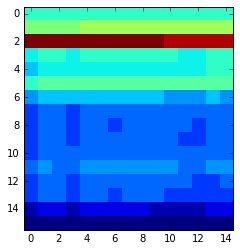

In [186]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)


i = 35
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

## Define model

In [187]:
model = Sequential()

model.add(Convolution3D(nb_filters[0], kernel_dim1=nb_conv[0], kernel_dim2=nb_conv[0], kernel_dim3=nb_conv[0],
input_shape=(1, img_rows, img_cols, img_depth), activation='relu'))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))

model.add(Dropout(0.6))

model.add(Flatten())

model.add(Dense(128, init='normal', activation='relu'))

model.add(Dropout(0.6))

model.add(Dense(nb_classes,init='normal'))

model.add(Activation('softmax'))

#model.compile(loss='categorical_crossentropy', optimizer='RMSprop')

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='sgd',metrics=['accuracy'])

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(32, (5, 5, 5), input_shape=(1, 16, 16..., activation="relu")`
  after removing the cwd from sys.path.
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal")`
  if sys.path[0] == '':
/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="normal")`
  app.launch_new_instance()


## Train/Testing the model

In [188]:
# Split the data

X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(train_set, Y_train, test_size=0.3, random_state=4)


# Train the model

hist = model.fit(X_train_new, y_train_new, validation_data=(X_val_new,y_val_new),
          batch_size=batch_size,nb_epoch = nb_epoch,shuffle=True)



 # Evaluate the model
score = model.evaluate(X_val_new, y_val_new, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 

/home/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 49 samples, validate on 21 samples
Epoch 1/50
49/49 [==============================] - 0s 4ms/step - loss: 0.6682 - acc: 0.6122 - val_loss: 0.6692 - val_acc: 0.5714
Epoch 2/50
49/49 [==============================] - 0s 5ms/step - loss: 0.6593 - acc: 0.6939 - val_loss: 0.6547 - val_acc: 0.5238
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 0.6351 - acc: 0.6939 - val_loss: 0.6306 - val_acc: 0.6190
Epoch 4/50
49/49 [==============================] - 0s 4ms/step - loss: 0.5259 - acc: 0.7959 - val_loss: 0.5692 - val_acc: 0.6667
Epoch 5/50
49/49 [==============================] - 0s 4ms/step - loss: 0.5086 - acc: 0.7551 - val_loss: 0.5124 - val_acc: 0.6667
Epoch 6/50
49/49 [==============================] - 0s 4ms/step - loss: 0.4502 - acc: 0.8367 - val_loss: 0.4283 - val_acc: 0.7143
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.3837 - acc: 0.8571 - val_loss: 0.3706 - val_acc: 0.7619
Epoch 8/50
49/49 [============================

## Display the results 

['seaborn-deep', 'seaborn-pastel', 'fast', 'bmh', 'seaborn-poster', 'seaborn-paper', 'seaborn-whitegrid', 'seaborn-notebook', 'seaborn-dark-palette', 'seaborn-ticks', 'fivethirtyeight', '_classic_test', 'Solarize_Light2', 'seaborn-dark', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn-talk', 'grayscale', 'seaborn', 'seaborn-white', 'dark_background', 'classic', 'tableau-colorblind10', 'seaborn-bright', 'seaborn-darkgrid']


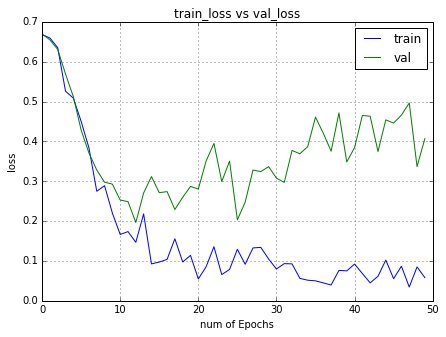

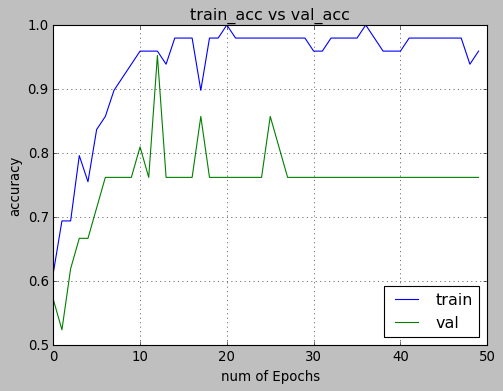

In [189]:
# Plot the results
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(50)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [190]:
from keras.models import model_from_json

model.compile(loss='mean_squared_error', optimizer='sgd')

In [191]:
with open('/home/user/Documents/New CSIR DSIDE Things/Code It, Snap It, Dip It/3D CNN in Keras (Rugby Edition)/labels.txt', 'r') as f:
    labels = [line.strip() for line in f.readlines()]
print('Total labels: {}'.format(len(labels)))

Total labels: 2


In [192]:
import cv2
import numpy as np

cap = cv2.VideoCapture('/home/user/Documents/New CSIR DSIDE Things/Code It, Snap It, Dip It/3D CNN in Keras (Rugby Edition)/Rugby Dataset/Line Outs/PLineOutClip(1).mp4')

vid = []
while True:
    ret, img = cap.read()
    if not ret:
        break
    vid.append(cv2.resize(img, (171, 128)))
vid = np.array(vid, dtype=np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


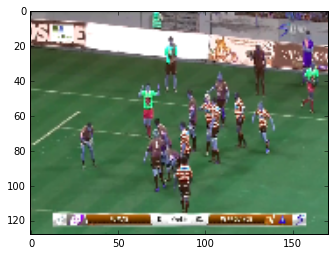

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(vid[82]/250)